# Satellite Land Cover trend assessment for Spatial Planning and Land Management

Production date: 01-07-2024

Produced by: +ATLANTIC

## 🌍 Use case: Using land cover products to quantify urbanization trends

## ❓ Quality assessment question
* **Is the dataset accurate and consistent for the analysis of urbanization trends in the Iberian Peninsula?**

Land Cover data is an invaluable resource for a wide range of fields, from climate change research to urban planning. Land Cover products that provide historical timelines enable scientists, policymakers, and planners to understand and analyse the transformation of land cover over recent decades [[1]](https://ec.europa.eu/eurostat/en/web/products-statistical-books/-/ks-01-16-691)[[2]](https://www.fao.org/3/cc3017en/online/state-food-security-and-nutrition-2023/drivers-patterns-dynamics-urbanization.html).

This notebook will access the ***Land cover classification gridded maps from 1992 to present derived from satellite observations*** (henceforth, LC) data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S), and analyse the spatial patterns of the LC over a given Area of Interest (AoI) and time.

## 📢 Quality assessment statement

* The highest urban growth rates per year were observed in Cataluña (31.275 km²/year), Comunitat Valenciana (29.499 km²/year), and Andalucía (29.224 km²/year). The values align with the findings of peer reviewed studies that highlighted significant urban growth in these regions, driven by population increases and expansion in built-up areas [[3]](https://www.mdpi.com/2071-1050/11/24/6948) [[4]](https://doi.org/10.3232/SJSS.2019.V9.N2.03) [[5]](https://doi.org/10.1007/S12061-021-09395-2) [[6]](https://revistaseug.ugr.es/index.php/cuadgeo/article/view/1711). This agreement supports the accuracy and consistency of the dataset.

* From 1992 to 2020, urban areas in Algarve and Alentejo grew four times the original size. Due to their small initial sizes, slope graphs couldn't clearly depict this growth. Calculating the percentage change in area emphasizes the significant expansion and the need for diverse data analysis methods, as demonstrated in a peer-reviewed study of Algarve's urban growth [[7]](https://doi.org/10.2139/ssrn.1940371).

* Although the analysis does not directly tackle the uncertainty associated with the dataset, recognizing the initial small urban area in Algarve and Alentejo and the need for different methods implicates an initial awareness of potential uncertainties and the importance of comprehensive approaches to accurately capture growth. 

* The identification of differences in urban areas in Algarve and Alentejo, despite their initial small size, indicates the dataset's sensitivity to capturing changes, even if they are not immediately apparent in slope graphs.

* The dataset demonstrates completeness and good spatial and temporal resolution, enabling an assessment of consistent urbanization trends across different NUTs over the Iberian Peninsula, as corroborated by peer-reviewed studies referenced in this notebook.


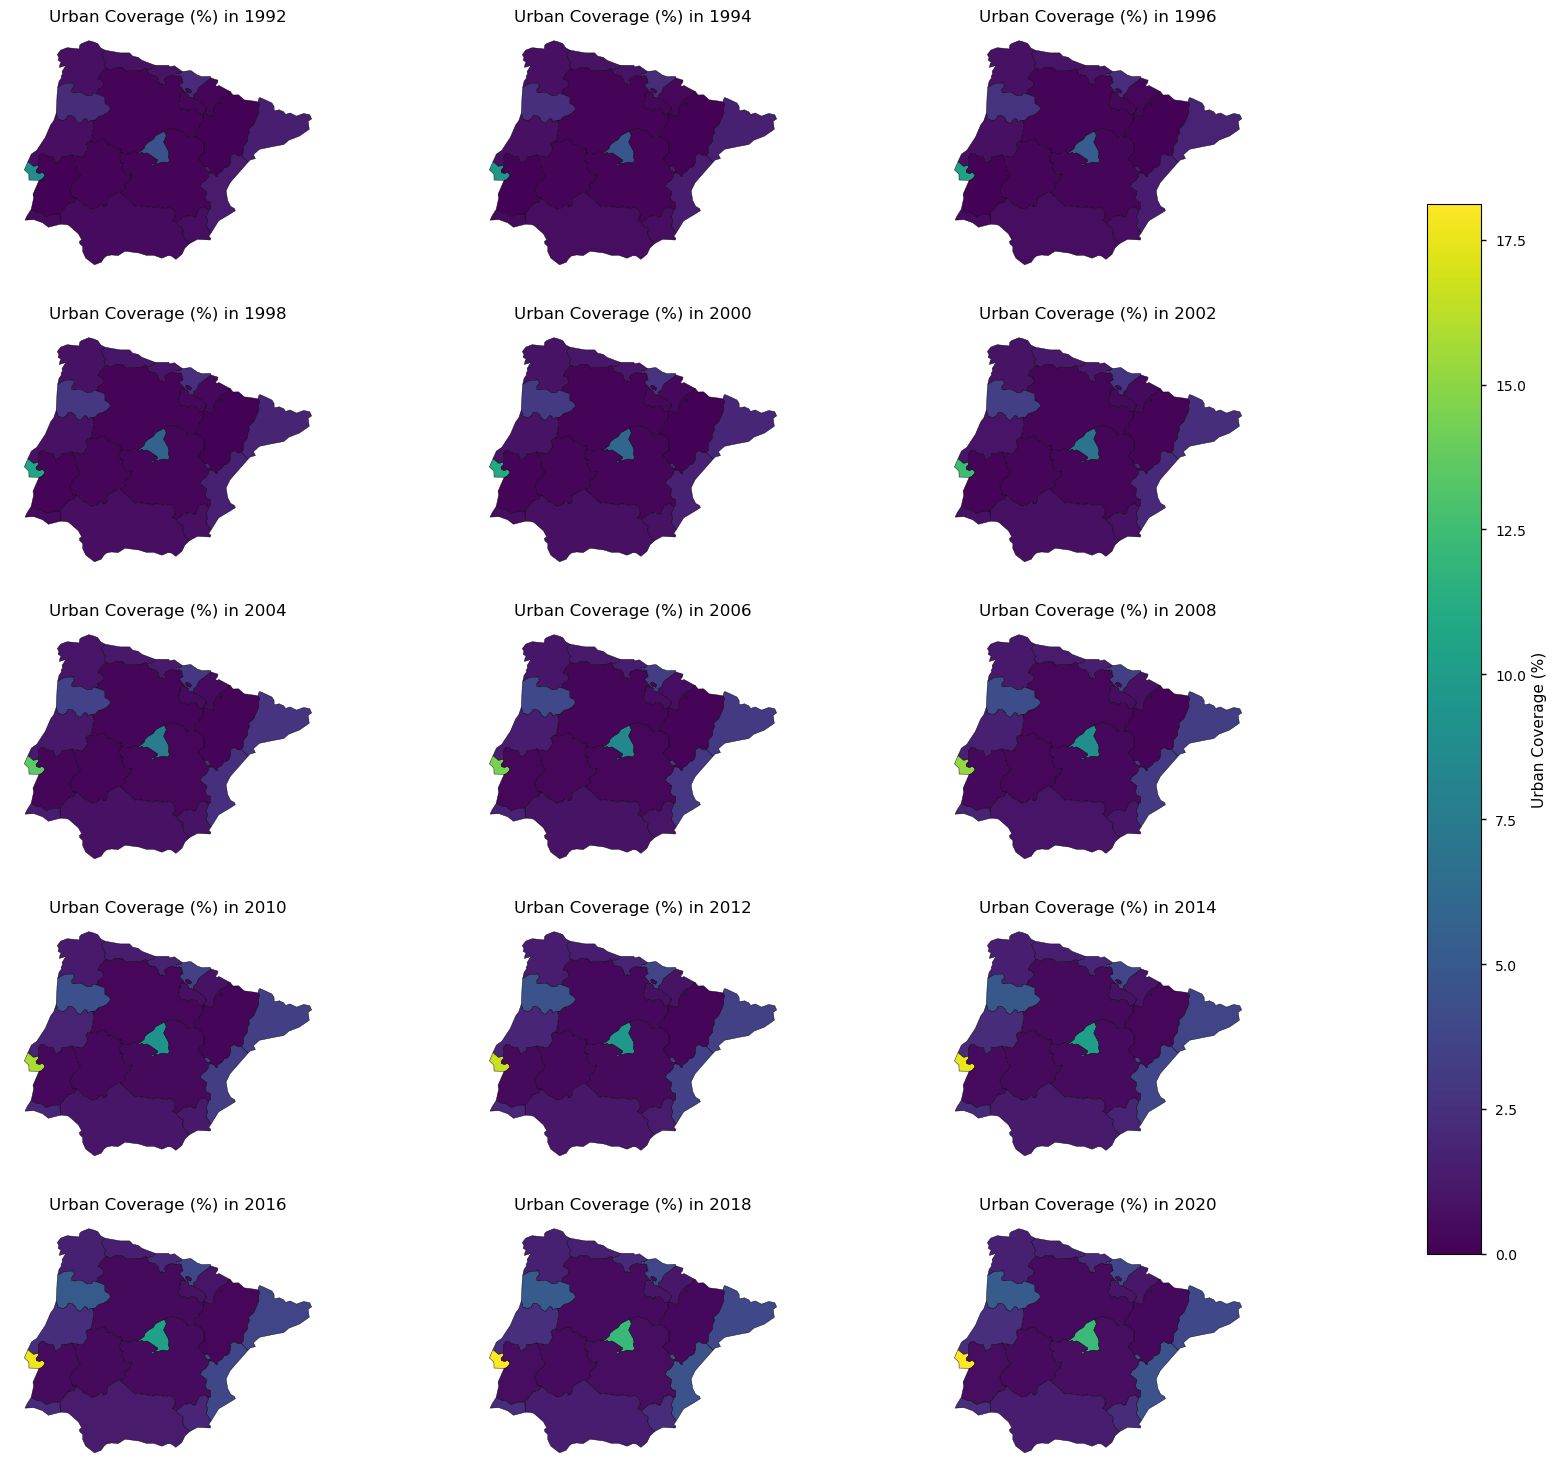

## 📋 Methodology

**This Use Case comprises the following steps:**

**[1. Define the AoI, search and download LC data.](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-1)**

**[2. Inspect and view data for the defined AoI (Iberian Peninsula).](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-2)**

**[3. Analyzing Temporal Trends of Urbanization](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-3)**

**[4. Map Urbanization trends by NUTS regions in the AoI.](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-4)**

**[5.Main Takeaways](C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-5)**

## 📈 Analysis and results

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-1)=
### 1. Define the AoI, search and download LC data.
Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various python libraries that we will need.

#### Install CDS API
To install the CDS API, run the following command. We use an exclamation mark to pass the command to the shell (not to the Python interpreter).
If you already have the CDS API installed, you can skip or comment this step.

In [ ]:
!pip install cdsapi

##### Import all the libraries/packages

We will be working with data in NetCDF format. To best handle this type of data we will use libraries for working with multidimensional arrays, in particular Xarray. 
We will also need libraries for plotting and viewing data.

In [1]:
import pandas as pd
import geopandas as gpd # import vector geospatial data
import matplotlib.pyplot as plt # plot graphs
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import shapely.geometry # work with geometric shapes
from shapely.geometry import Polygon


import regionmask # transform attributes and geometries into specific regions
import xarray as xr
from c3s_eqc_automatic_quality_control import download, plot, utils 

plt.style.use("seaborn-v0_8-notebook") # predefined style of all graphical outputs

##### Data Overview

To search for data, visit the CDS website: http://cds.climate.copernicus.eu. Here you can search for 'Satellite observations' using the search bar. The data we need for this tutorial is the ***Land cover classification gridded maps from 1992 to present derived from satellite observations***. This catalogue entry provides global Land Cover Classification (LCC) maps with a very high spatial resolution, with a L4 processing level, on an annual basis with a one-year delay, following the [Global Climate Observing System (GCOS) convention requirements](https://library.wmo.int/records/item/58111-the-2022-gcos-ecvs-requirements-gcos-245). LULC maps correspond to a global classification scheme, encompassing 22 classes. For intercomparison consistency, <ins>LC classes are grouped into the six IPCC land categories:</ins> **cropland, forest, grassland, wetland, settlement, and other land (shrubland, sparse vegetation, bare area and water)**, as gathered from several international sources.

The dataset consists of 2 versions (v2.0.7 produced by the European Space Agency (ESA) Climate Change Initiative (CCI) and v2.1.1 produced by Copernicus Climate Change Service (C3S)).

Data specifications for this use case:
* **Years:** 1992 to 2020 (bi-annual)
* **Version:** v2.0.7 before 1992 and v2.1.1 after 2016
* **Format:** Zip files

At the end of the download form, select “**Show API request**”. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook. Having copied the API request, running it will retrieve and download the data you requested into your local directory. However, before you run it, the **terms and conditions** of this particular dataset need to have been accepted directly at the CDS website. The option to view and accept these conditions is given at the end of the download form, just above the “**Show API request**” option. In addition, it is also useful to define the time period and AoI parameters and edit the request accordingly, as exemplified in the cells below.

In [2]:
#Years to download
years = [1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]


In [4]:
# List of requests to retrieve data
collection_id = "satellite-land-cover"
requests = [
    {
        "variable": "all",
        "format": "zip",
        "version": "v2_0_7cds" if year < 2016 else "v2_1_1",
        "year": str(year),
        "area": [45, -10, 35, 4] # Region of interest (Iberian Peninsula)
    }
    for year in years
]

In [ ]:
# Download and regionalize by AoI
ds = download.download_and_transform(
    collection_id,
    requests,
)
ds = ds.assign_coords(year=ds["time"].dt.year).swap_dims(time="year").drop("time")


In [9]:
#Inspect the database
ds

<xarray.Dataset>
Dimensions:              (year: 15, latitude: 3600, longitude: 5040, bounds: 2)
Coordinates:
    lat_bounds           (longitude, latitude, bounds) float64 dask.array<chunksize=(5040, 3600, 2), meta=np.ndarray>
    lon_bounds           (longitude, bounds) float64 dask.array<chunksize=(5040, 2), meta=np.ndarray>
    time_bounds          (longitude, year, bounds) datetime64[ns] dask.array<chunksize=(5040, 1, 2), meta=np.ndarray>
  * latitude             (latitude) float64 45.0 45.0 44.99 ... 35.01 35.0 35.0
  * longitude            (longitude) float64 -9.999 -9.996 ... 3.996 3.999
  * year                 (year) int32 1992 1994 1996 1998 ... 2016 2018 2020
Dimensions without coordinates: bounds
Data variables:
    lccs_class           (year, latitude, longitude) uint8 dask.array<chunksize=(1, 3600, 5040), meta=np.ndarray>
    processed_flag       (year, latitude, longitude) float32 dask.array<chunksize=(1, 3600, 5040), meta=np.ndarray>
    current_pixel_state  (year, latitude, longitude) float32 dask.array<chunksize=(1, 3600, 5040), meta=np.ndarray>
    observation_count    (year, latitude, longitude) uint16 dask.array<chunksize=(1, 3600, 5040), meta=np.ndarray>
    change_count         (year, latitude, longitude) uint8 dask.array<chunksize=(1, 3600, 5040), meta=np.ndarray>
    crs                  (year, longitude) int32 dask.array<chunksize=(1, 5040), meta=np.ndarray>
Attributes: (12/38)
    id:                         ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-v2.0.7cds
    title:                      Land Cover Map of ESA CCI brokered by CDS
    summary:                    This dataset characterizes the land cover of ...
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-landcover-cci.org/
    ...                         ...
    geospatial_lon_max:         180
    spatial_resolution:         300m
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.002778
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.002778

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-2)=
### 2. Inspect and view data for the defined AoI (Iberian Peninsula)
#### Compute Land Cover classes area coverage for each NUTS 2 region

To further identify changes in LC patterns, in this user question, NUTS 2 will be used, providing the information reggarding the main regions/parcels of the Iberian Peninsula.

The NUTS are a hierarchical system divided into 3 levels (https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts). NUTS 1 correspond to major socio-economic regions, NUTS 2 correspond to basic regions for the application of regional policies, and NUTS 3 correpsond to small regions for specific diagnoses. Additionally a NUTS 0 level, usually co-incident with national boundaries is also available. The NUTS legislation is periodically amended; therefore multiple years are available for download. 


The step below masks the Land Cover data according to the NUTS 2 boundaries and calculate the area of each pixel (weighted by the cosine of Latitude). For each NUTS 2, we proceed with the analysis and visual inspection of Land Cover areas per class and corresponding percentages during the elected period.

#### Mask regions

First, we need to establish the geometry of the NUTS region (level 2) in order to make the corresponding statistics.

In [10]:
# Shapefile with regions (NUTS2)
shapefile_url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/shp/NUTS_RG_20M_2021_4326.shp.zip" #NUTS2 download path

In [14]:
# Define the CRS for the Iberian Peninsula (WGS84)
crs = "epsg:4326"  # EPSG code for WGS84 (latitude/longitude)

# Data filter: load the shapefile and filter for NUTS2 regions in Spain and Portugal
gdf = gpd.read_file(shapefile_url)  # Read the shapefile NUTS2
gdf = gdf[gdf["LEVL_CODE"] == 2]  # Keep only features at the second administrative level (NUTS2)
gdf = gdf[gdf["NUTS_ID"].str.startswith(("ES", "PT"))]  # Keep only NUTS2 regions for Spain (ES) and Portugal (PT)
gdf = gdf.to_crs(crs)  # Ensure CRS is consistent with the dataset

# Create a mask for the NUTS2 regions that intersect with the Iberian Peninsula
regions = regionmask.from_geopandas(gdf, names="NUTS_NAME")  # Create regions mask based on GeoPandas DataFrame

# Apply the mask to the dataset
mask = regions.mask(ds["longitude"], ds["latitude"])

# Only keep land areas (not ocean) by applying the mask
# This ensures that only land pixels are used in the area calculations
import dask
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ds = ds.where(mask.notnull(), drop=True)  # Apply mask to drop ocean pixels

#### Compute cell area

Then, we can calculate the area of each pixel taking into consideration the curvature of the earth (i.e., weighted by the cosine of Latitude).

In [15]:
# Calculate Pixel Area after applying the mask
scaling_factor = 0.002778  # Define a scaling factor for conversion
resolution_km = scaling_factor * 111.195  # Calculate the grid cell resolution in kilometers
indexes = xr.DataArray(range(ds.sizes["latitude"]), dims="latitude")  # Create an array of latitude indexes
lats = ds["latitude"].max() - indexes * scaling_factor
grid_cell_area = resolution_km**2 * np.cos(np.radians(lats))
grid_cell_area.attrs = {
    "standard_name": "cell_area",
    "long_name": "Area",
    "units": "km2",
}
ds = ds.assign_coords(cell_area=grid_cell_area)

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-3)=
### 3. Analyzing Temporal Trends of Urbanization
#### Evaluating the direction and magnitude of changes over time

We employ the Mann-Kendall trend test to identify potential trends within time-series data, focusing on examining whether there exists a statistically significant increase or decrease in urban areas over the years. A positive Mann-Kendall test result indicates an upward trend, suggesting an increase in urban area over time, while a negative result signals a downward trend, indicating a reduction in urban area. If the test yields a statistically significant result (commonly p-value < 0.05), it implies that the observed trend is unlikely to be due to random variation and is likely reflective of a true underlying trend.

Complementing the Mann-Kendall test, the Theil-Sen estimator provides a robust non-parametric method to estimate the slope of the trend of the time series. The magnitude of the slope indicates the rate of change: a positive slope implies an increase in urbanization, while a negative slope suggests a decrease. The Theil-Sen estimator is particularly useful because it provides a reliable estimate of the median rate of change, even in the presence of outliers or non-normal data.

Interpreting these two tests together offers deeper insight: the Mann-Kendall test tells us whether there is a trend and the direction of that trend, while the Theil-Sen estimator quantifies how fast the urbanization is occurring (or declining). This combination allows for a comprehensive understanding of the trend's direction and its rate of change, providing robust evidence for urbanization patterns over time.

#### Plot trends by region

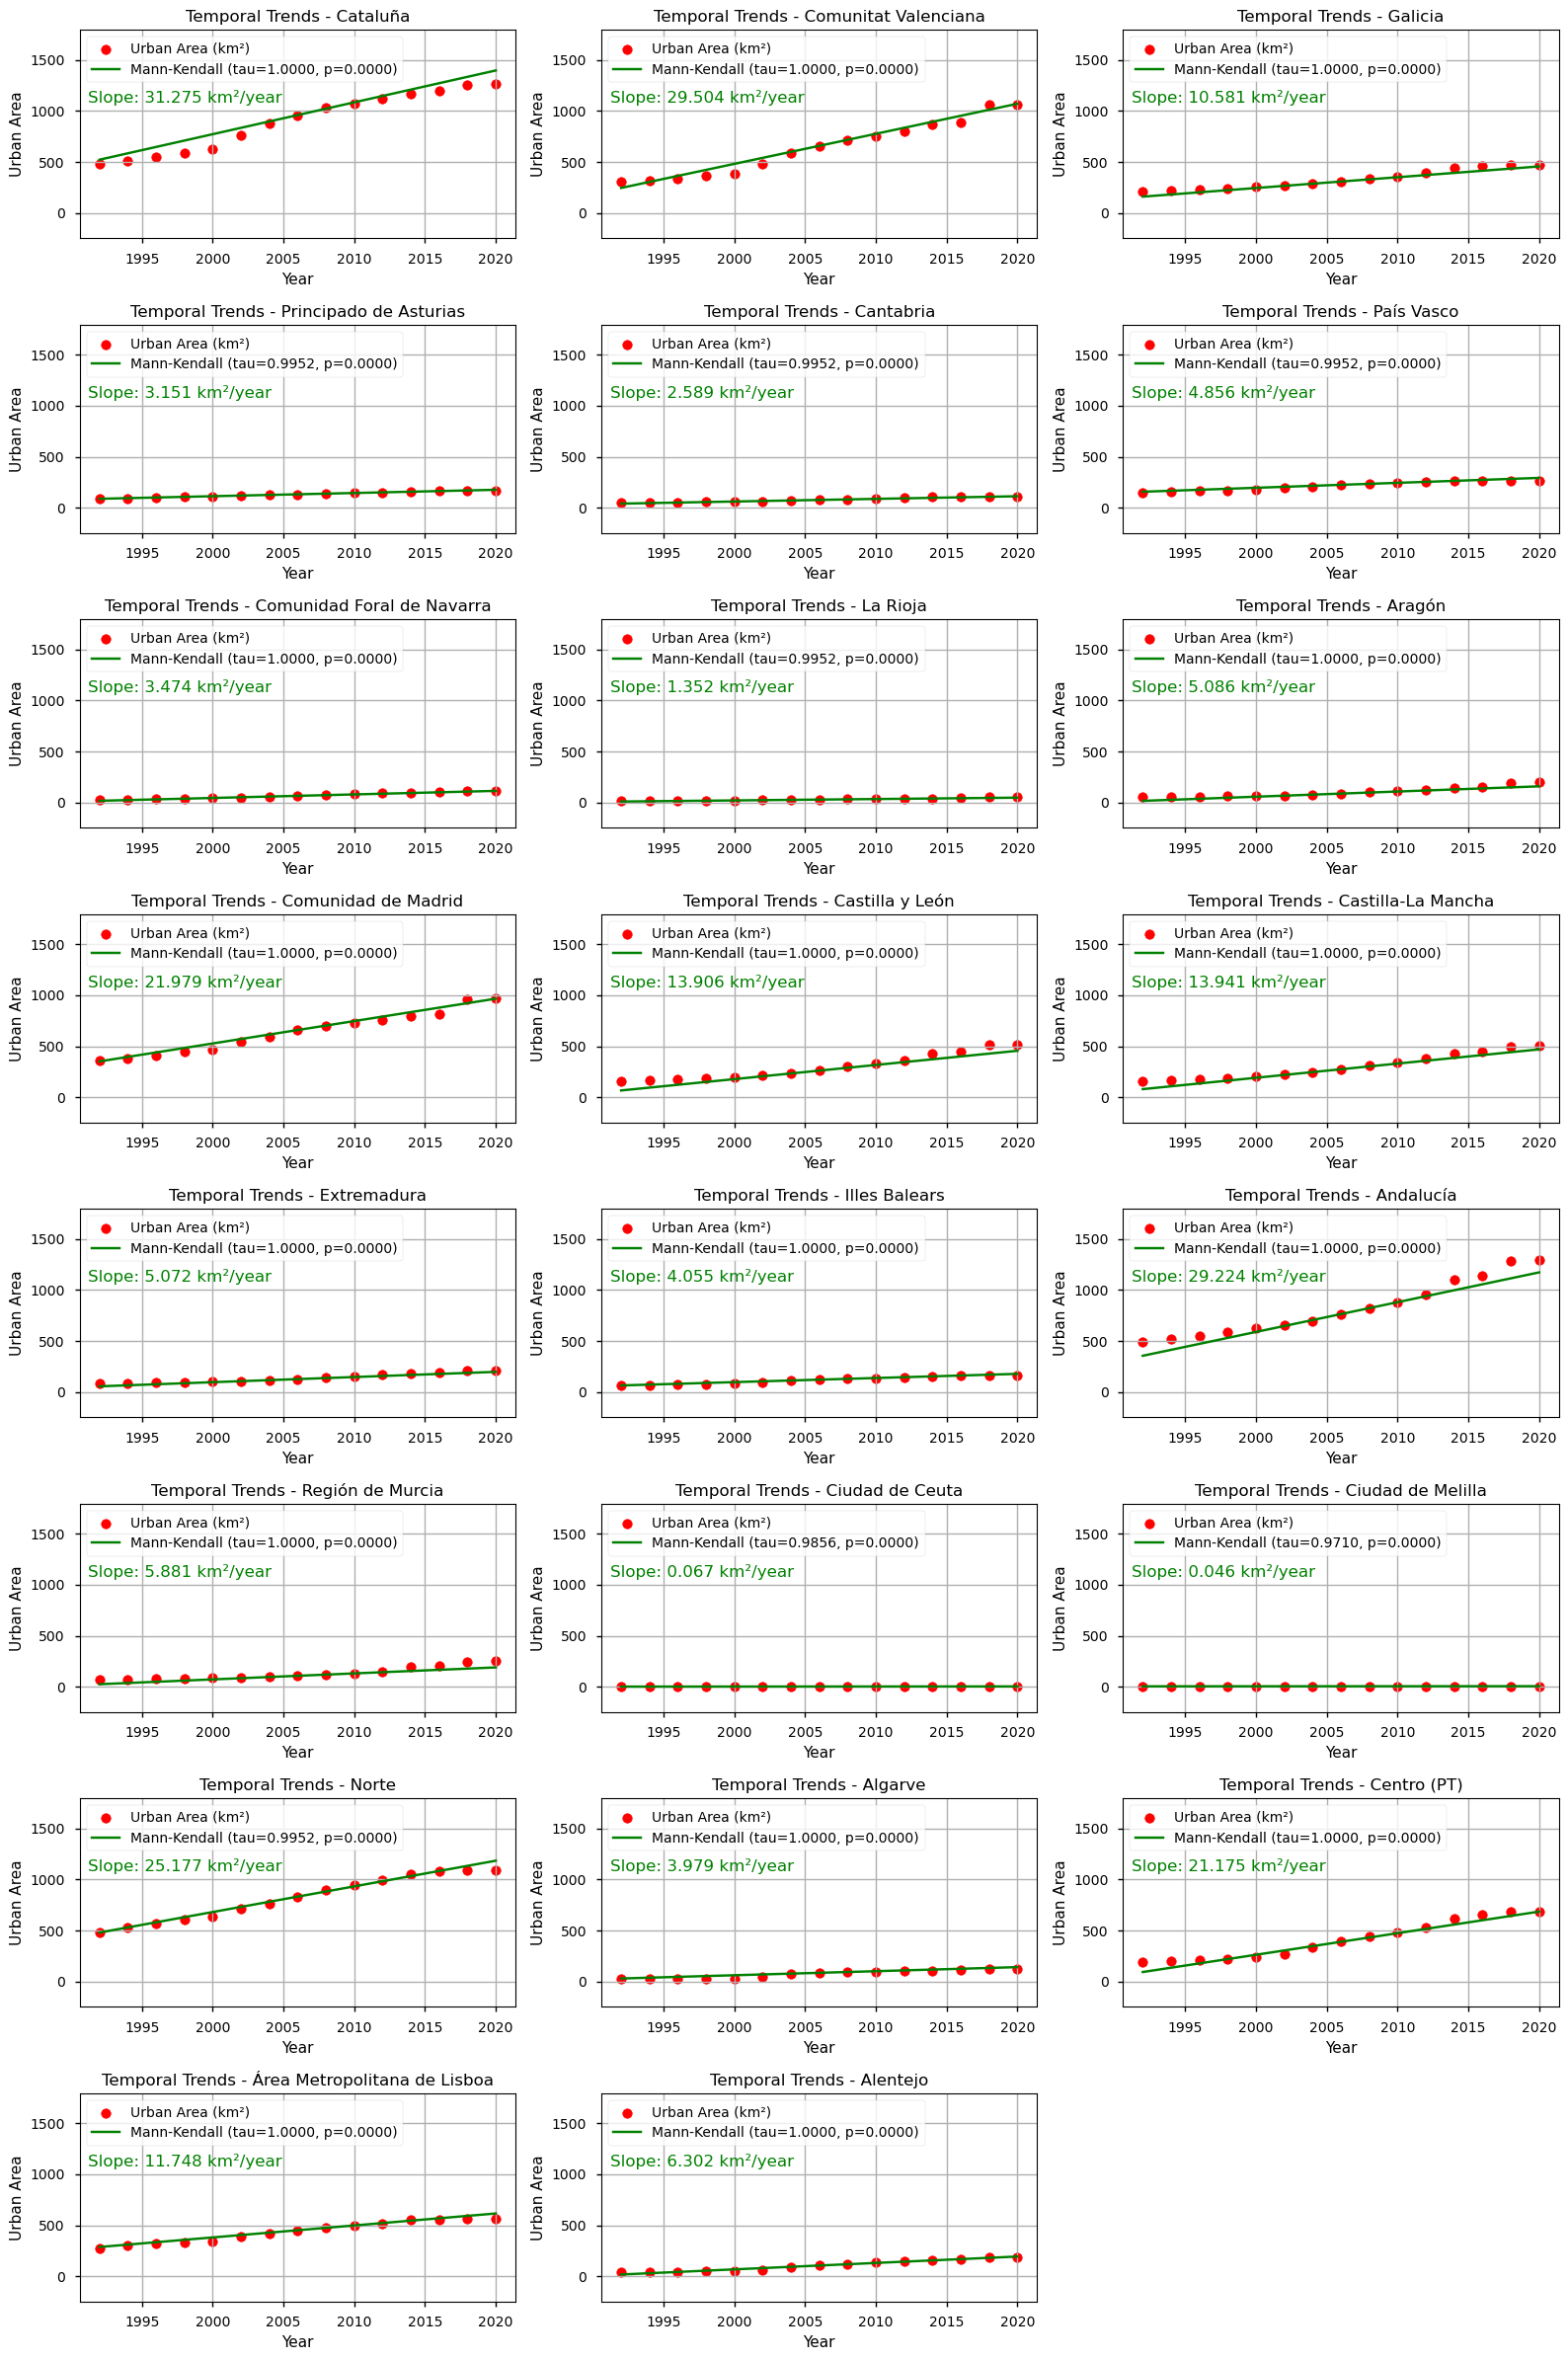

In [18]:
import numpy as np
from scipy.stats import kendalltau
from scipy.stats import theilslopes
import dask

# Ensure large chunks are split to avoid performance warnings
dask.config.set(scheduler='threads', **{'array.slicing.split_large_chunks': True})

slope = {}  # dictionary with the slope for every NUTS region
growth = {}  # dictionary with a dictionary of the urban area of every year, for every NUTS region
urban_area_values = []  # To collect all urban area values across regions

for index, ds_region in ds.groupby(mask):  # for each NUTS region
    urban_area = {}  # create a dictionary with keys = years and values = urban area in those regions
    region = regions[int(index)].name

    for j in range(len(ds_region['year'].values)):  # for each year of our dataset
        # calculate the urban area for each year
        year = ds_region['year'].values[j]
        lccs_class = ds_region['lccs_class'][j].values
        area = ds_region["cell_area"].values
        total_area = 0
        for i in range(len(lccs_class)):
            if lccs_class[i] == 190:        # here we choose the LC class (e.g. 190=urban)
                total_area += area[i]
        urban_area[year] = total_area

    growth[region] = urban_area
    urban_area_values.extend(urban_area.values())  # Collect urban area values

    years = list(urban_area.keys())
    values = list(urban_area.values())
    
# Number of regions
num_regions = len(growth)
cols = 3  # For example, you can have 3 plots in a row.
rows = int(np.ceil(num_regions / cols))

fig, axes = plt.subplots(rows, cols, figsize=(16, 3 * rows))  # Adjust the figsize for better visualization.

# Flatten the axes for easier iteration
axes = axes.ravel()

# Calculate the common y-axis limits
y_min = min(urban_area_values) - 250
y_max = max(urban_area_values) + 500

# Iterate through the regions and create plots on the same image
for idx, region in enumerate(growth):
    years = list(growth[region].keys())
    values = list(growth[region].values())
    
    tau, p_value = kendalltau(years, values)
    slope, intercept, _, _ = theilslopes(values, years)

    # Plot the data points
    axes[idx].scatter(years, values, label='Urban Area', color='r')

    # Plot Mann-Kendall trend line
    axes[idx].plot(years, [slope * year + intercept for year in years], color='g')

    # Add labels and legend
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Urban Area')
    axes[idx].set_title(f'Temporal Trends - {region}')
    axes[idx].grid(True)
    axes[idx].set_ylim(y_min, y_max)

    # Add the legend with slope information
    axes[idx].legend([f'Urban Area (km²)', f'Mann-Kendall (tau={tau:.4f}, p={p_value:.4f})'], loc='upper left')

    # Add the slope information as text just below the legend
    axes[idx].text(0.02, 0.65, f'Slope: {slope:.3f} km²/year', fontsize=12, color='g', transform=axes[idx].transAxes)

# Remove any unused subplots
for idx in range(num_regions, rows*cols):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()



#### Plot the regions with the highest slope

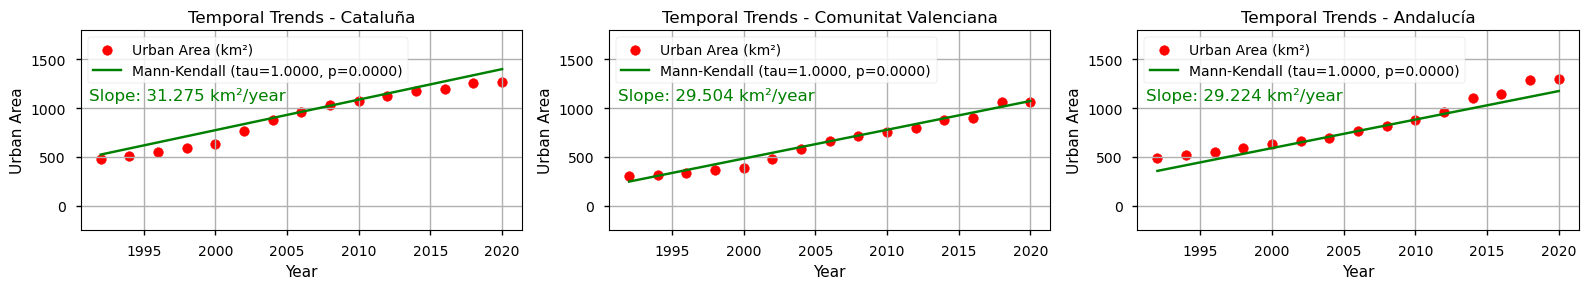

In [19]:
import numpy as np
from scipy.stats import kendalltau
from scipy.stats import theilslopes
import matplotlib.pyplot as plt

# Ensure large chunks are split to avoid performance warnings
dask.config.set(scheduler='threads', **{'array.slicing.split_large_chunks': True})

slope_dict = {}  # dictionary with the slope for every NUTS region
intercepts_dict = {}  # dictionary with the intercept for every NUTS region
growth = {}  # dictionary with a dictionary of the urban area of every year, for every NUTS region
urban_area_values = []  # To collect all urban area values across regions

for index, ds_region in ds.groupby(mask):  # for each NUTS region
    urban_area = {}  # create a dictionary with keys = years and values = urban area in those regions
    region = regions[int(index)].name

    for j in range(len(ds_region['year'].values)):  # for each year of our dataset
        year = ds_region['year'].values[j]
        lccs_class = ds_region['lccs_class'][j].values
        area = ds_region["cell_area"].values
        total_area = 0
        for i in range(len(lccs_class)):
            if lccs_class[i] == 190: # here we choose the LC class (e.g. 190=urban)
                total_area += area[i]
        urban_area[year] = total_area

    growth[region] = urban_area
    urban_area_values.extend(urban_area.values())  # Collect urban area values

    years = list(urban_area.keys())
    values = list(urban_area.values())
    
    slope_value, intercept, _, _ = theilslopes(values, years)
    slope_dict[region] = slope_value
    intercepts_dict[region] = intercept

# Sort regions by slope values in descending order and take the top three
top_regions = sorted(slope_dict, key=slope_dict.get, reverse=True)[:3]

# Number of regions
num_regions = len(top_regions)
cols = 3
rows = int(np.ceil(num_regions / cols))

fig, axes = plt.subplots(rows, cols, figsize=(16, 3 * rows))

# Flatten the axes for easier iteration
axes = axes.ravel()

# Calculate the common y-axis limits
y_min = min(urban_area_values) - 250
y_max = max(urban_area_values) + 500

# Iterate through the top regions and create plots on the same image
for idx, region in enumerate(top_regions):
    years = list(growth[region].keys())
    values = list(growth[region].values())
    
    tau, p_value = kendalltau(years, values)
    slope_for_region = slope_dict[region]
    intercept_for_region = intercepts_dict[region]

    axes[idx].scatter(years, values, label='Urban Area', color='r')
    axes[idx].plot(years, [slope_for_region * year + intercept_for_region for year in years], color='g')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Urban Area')
    axes[idx].set_title(f'Temporal Trends - {region}')
    axes[idx].grid(True)
    axes[idx].set_ylim(y_min, y_max)
    axes[idx].legend([f'Urban Area (km²)', f'Mann-Kendall (tau={tau:.4f}, p={p_value:.4f})'], loc='upper left')
    axes[idx].text(0.02, 0.65, f'Slope: {slope_for_region:.3f} km²/year', fontsize=12, color='g', transform=axes[idx].transAxes)

plt.tight_layout()
plt.show()


#### Plot analysis
Across all regions, there's a consistent trend of urban area growth over the years. The growth is represented by the upward slope of the green lines.

Mann-Kendall tau: For most regions, the Mann-Kendall tau value is close to 1 (either 1.0000 or 0.9952), indicating a strong positive trend. The associated p values are all 0.0000, suggesting that the trend is statistically significant.

Slope: The slope provides the rate of urban area growth per year in km²/year. The values differ across regions, indicating variable growth rates. For instance: "Comunitat Valenciana" has one of the highest growth rates at 29.499 km²/year. "Cantabria" has one of the lowest at 2.589 km²/year.

Consistency: Almost all regions show a very consistent growth in urban area, with only minor fluctuations over the 25-year period.

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-4)=
### 4. Map Urbanization trends by NUTS regions in the AoI

In [20]:
# Load the NUTS shapefile for 2021
nuts = gpd.read_file('./NUTS_RG_20M_2021_4326.shp')

# Subset the NUTS shapefile to the level you want to analyze
nuts_level_2 = nuts[nuts['LEVL_CODE'] == 2]

# Define the bounding box for the Continental part of the Iberian Peninsula
xmin, ymin, xmax, ymax = -10.18, 36.5, 1, 43
bbox = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])

# Select only those NUTS polygons that intersect with the bounding box of the Iberian Peninsula
iberian_nuts = nuts_level_2[nuts_level_2.intersects(bbox)]

# Filter the rows based on nuts_id column
cont_iberian_nuts = iberian_nuts[iberian_nuts['NUTS_ID'].str.startswith(('ES', 'PT'))]

#Assign a common Coordinate Reference System (CRF) to the NUTS gdf and the xarray
cont_iberian_nuts = cont_iberian_nuts.to_crs('epsg:4326')

In [21]:
# Create dataset with the bounds to determine the slice values (regions)
pt_aoi = cont_iberian_nuts

# Merge the GeoDataFrame with the slope DataFrame based on "NUTS_NAME"
slope_df = pd.DataFrame(list(slope_dict.items()), columns=["NUTS_NAME", "Slope"])
merged_df = pt_aoi.merge(slope_df, on="NUTS_NAME")


#### Map biennially urban area percentage in the AoI regions

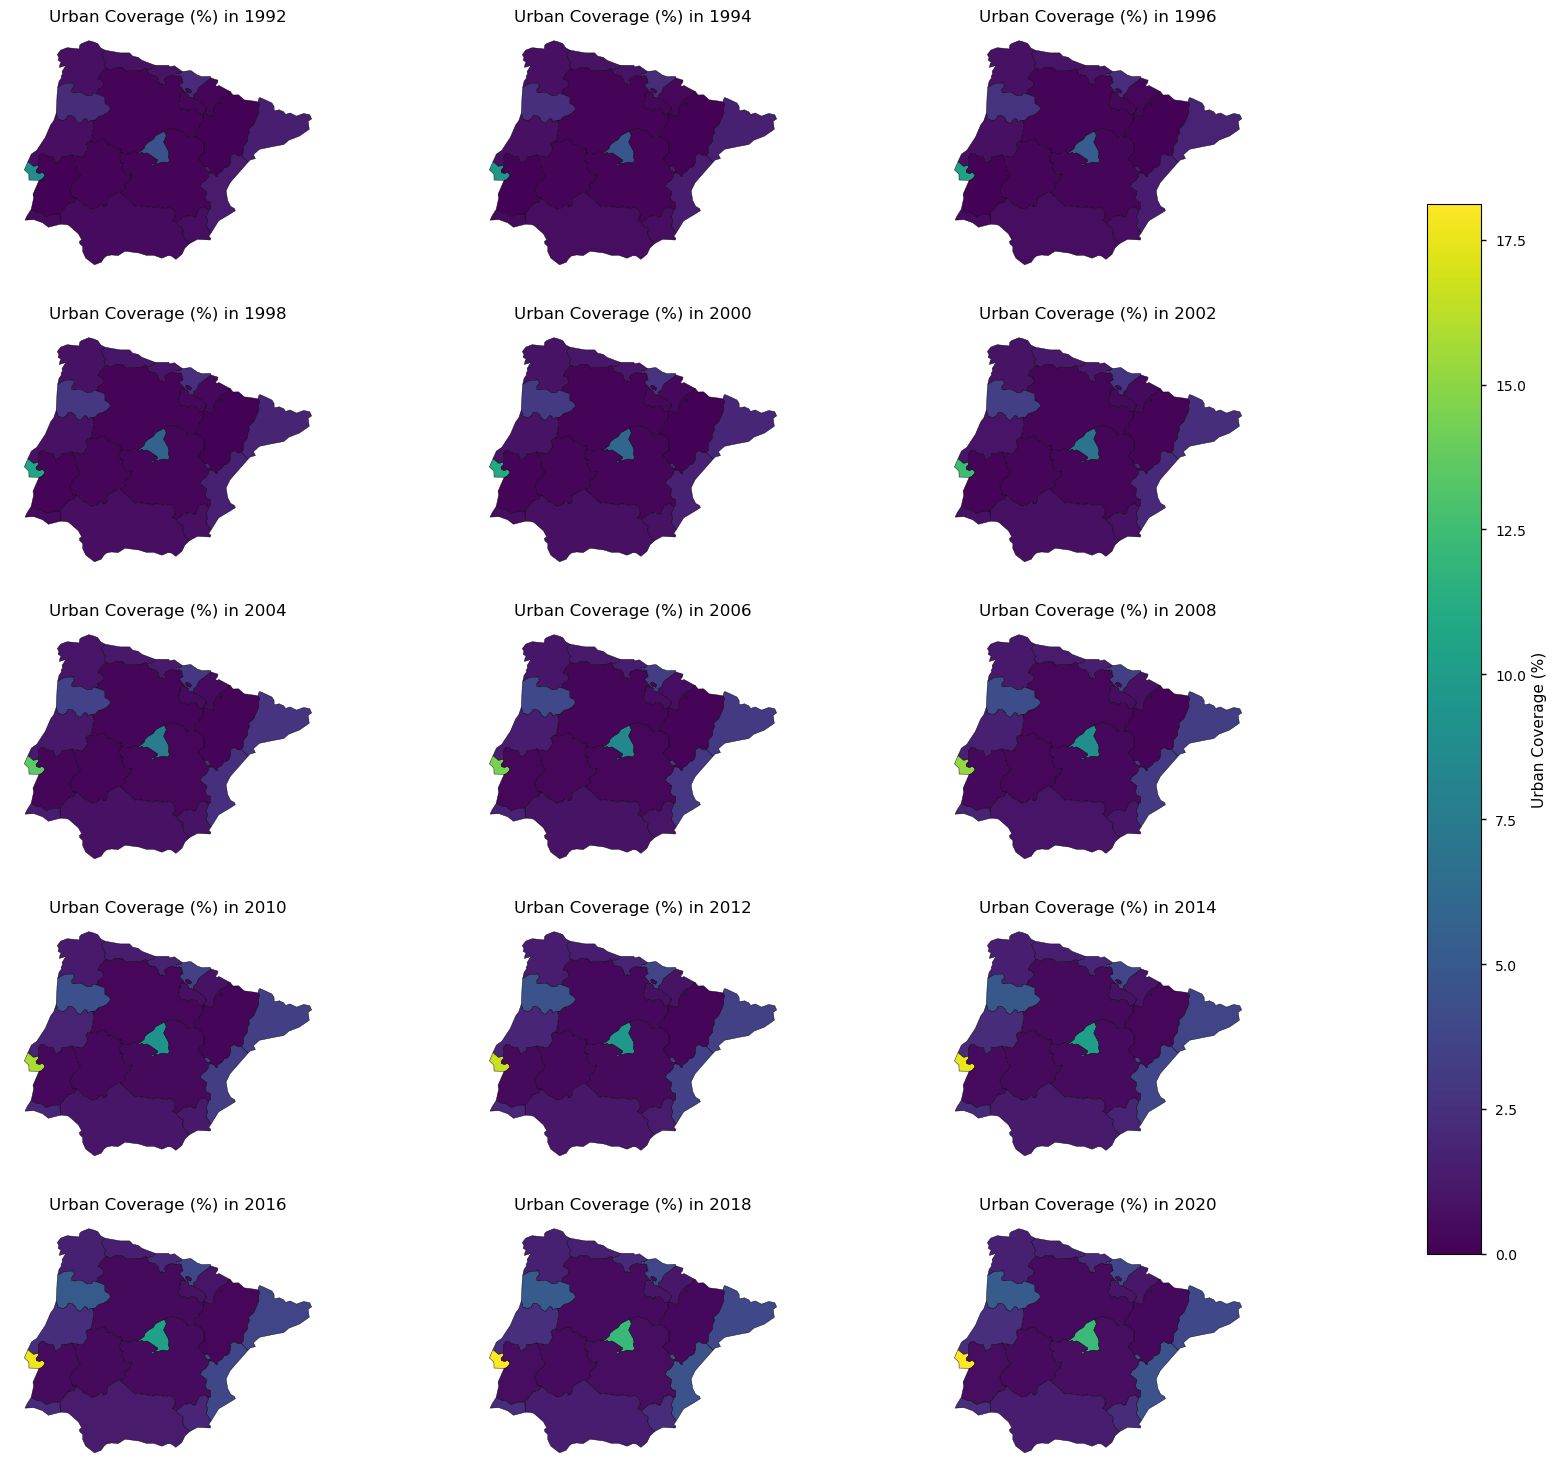

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reproject the GeoDataFrame to a projected CRS (EPSG:3035 is a good choice for Europe)
pt_aoi = pt_aoi.to_crs("EPSG:3035")

# Convert the "growth" dictionary into a DataFrame suitable for plotting
growth_df = pd.DataFrame([(region, year, value) for region, years in growth.items() for year, value in years.items()],
                         columns=["NUTS_NAME", "Year", "Urban_Area"])

# Pivot the DataFrame to have years as columns
growth_pivot = growth_df.pivot(index="NUTS_NAME", columns="Year", values="Urban_Area").reset_index()

# Calculate the total area of each region (now that the CRS is projected in meters)
pt_aoi["Total_Area"] = pt_aoi.geometry.area / 10**6  # Total area in square kilometers

# Merge the pivoted DataFrame with "pt_aoi" based on "NUTS_NAME"
pt_aoi_growth = pt_aoi.merge(growth_pivot, on="NUTS_NAME")

# Calculate percentage of urban coverage by dividing by the total area of each region and multiplying by 100
for year in growth_pivot.columns[1:]:
    pt_aoi_growth[year] = (pt_aoi_growth[year] / pt_aoi_growth['Total_Area']) * 100

# Extract years from the DataFrame, assuming they start from the second column
years = growth_pivot.columns[1:]

# Calculate the number of rows and columns for the subplots
n_cols = 3
n_rows = int(np.ceil(len(years) / n_cols))

# Create a figure with multiple axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 3), squeeze=False)

# Normalize color scale across all maps for percentage values (0 to 100%)
# Normalize color scale across all maps based on percentage coverage (using a similar range to absolute)
norm_percentage = plt.Normalize(vmin=0, vmax=pt_aoi_growth[years].max().max())  # Adjust vmax for reasonable percentage


# Plot each year in a separate subplot
for idx, year in enumerate(years):
    row, col = divmod(idx, n_cols)
    ax = axes[row, col]
    pt_aoi_growth.plot(column=year, cmap="viridis", ax=ax, norm=norm_percentage, edgecolor='k')
    ax.set_title(f"Urban Coverage (%) in {year}")
    ax.axis('off')  # Turn off the axis

# Hide any unused subplots
for idx in range(len(years), n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row, col].axis('off')

# Adjust the layout to prevent the subplots from overlapping
plt.tight_layout()

# Allocate space for the color bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])  # Create a new axes for color bar

# Create a single ScalarMappable object for the common colorbar
sm_common = plt.cm.ScalarMappable(cmap="viridis", norm=norm_percentage)
sm_common._A = []  # Dummy array for the scalar mappable
fig.colorbar(sm_common, cax=cbar_ax, label="Urban Coverage (%)")

plt.show()



#### Map Analys

**How to interpret:** For each year, the percentage of the region's area that is urbanized is calculated by dividing the urban area by the total area of the region and multiplying by 100. This results in the urban area coverage expressed as a percentage of the total area for each region, for each year.

**Analysis:** 

* Comunidad de Madrid and Área Metropolitana de Lisboa consistently stand out with the highest levels of urban coverage, as evidenced by its strong green and yellow colors throughout the maps. 
* Coastal areas tend to show a higher degree of urban converage compared to inland areas. 

#### Map biennially urban area change

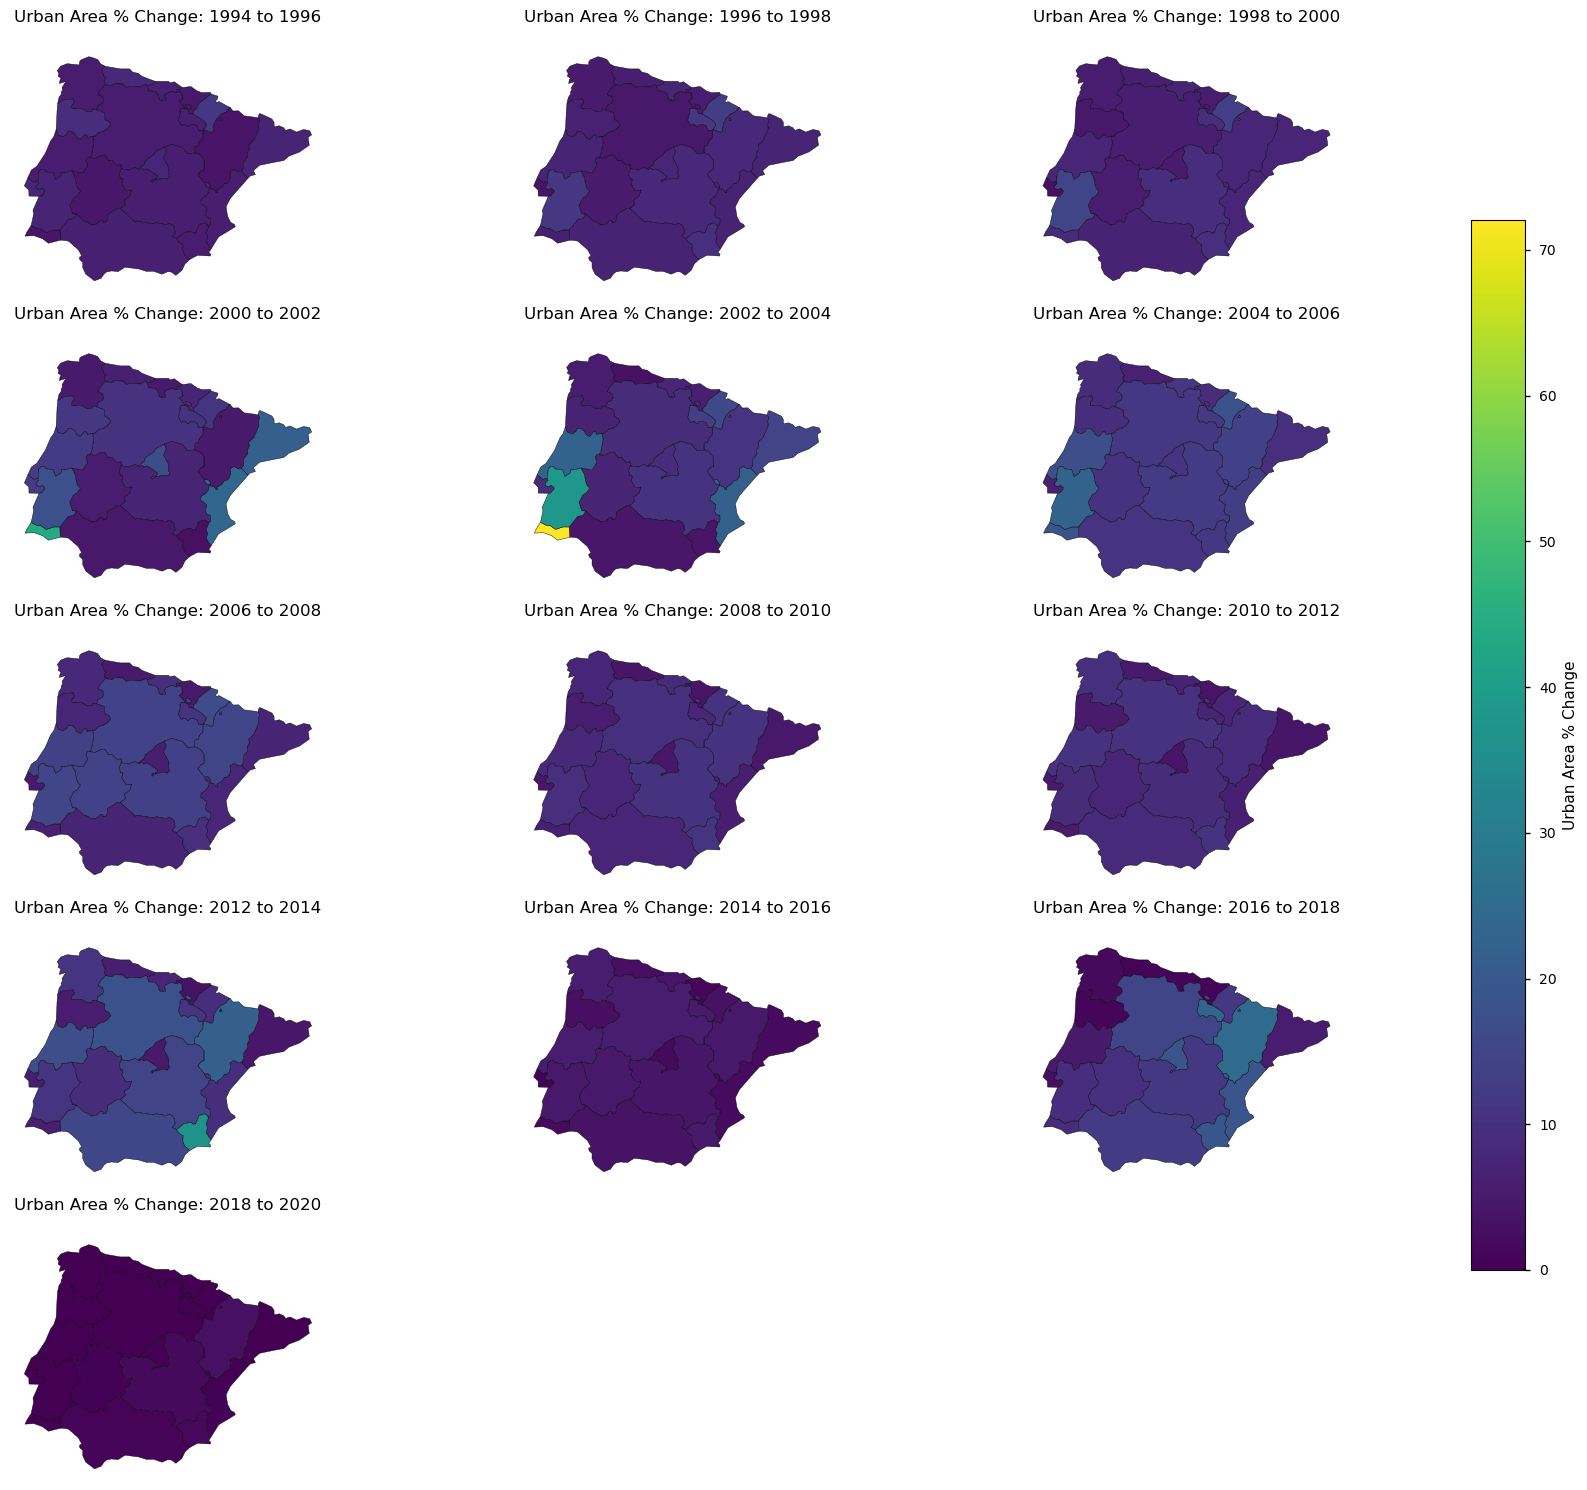

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize

# Assuming 'years' is the list of years sorted chronologically
# Calculate year-to-year percentage differences, starting from the second year
for i in range(1, len(years)):
    # Calculate percentage difference and handle division by zero (if urban area was 0 in the previous year)
    pt_aoi_growth[f'Diff_{years[i]}'] = (pt_aoi_growth[years[i]] - pt_aoi_growth[years[i-1]]) / pt_aoi_growth[years[i-1]] * 100

# The 'years' list now includes the first year too
# Update 'diff_years' to reflect the difference columns (between consecutive years)
diff_years = [f'Diff_{year}' for year in years[1:]]

# Check the actual min and max percentage differences to ensure there is variation
actual_min_diff = pt_aoi_growth[diff_years].min().min()
actual_max_diff = pt_aoi_growth[diff_years].max().max()

# Use the actual minimum and maximum percentage differences for normalization
norm = Normalize(vmin=actual_min_diff, vmax=actual_max_diff)

# Use original colormap "viridis" and apply the updated normalization
cmap = plt.cm.viridis

# Calculate the number of rows and columns for the subplots
n_cols = 3
n_rows = int(np.ceil(len(diff_years) / n_cols))

# Create a figure with multiple axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 3), squeeze=False)

# Plot each year's percentage difference in a separate subplot
for idx, diff_year in enumerate(diff_years):
    row, col = divmod(idx, n_cols)
    ax = axes[row, col]
    pt_aoi_growth.plot(column=diff_year, cmap=cmap, ax=ax, norm=norm, edgecolor='k')
    
    # Modify the title to include the current and previous year
    current_year = years[idx + 1]  # Current year corresponds to diff_year
    previous_year = years[idx]  # Previous year corresponds to the year before current_year
    ax.set_title(f"Urban Area % Change: {previous_year} to {current_year}")
    ax.axis('off')  # Turn off the axis

# Hide any unused subplots
for idx in range(len(diff_years), n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row, col].axis('off')

# Adjust the layout to prevent the subplots from overlapping
plt.tight_layout()

# Allocate space for the color bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])  # Create a new axes for color bar

# Create a single ScalarMappable object for the common colorbar
sm_common = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm_common._A = []  # Dummy array for the scalar mappable
fig.colorbar(sm_common, cax=cbar_ax, label="Urban Area % Change")

plt.show()



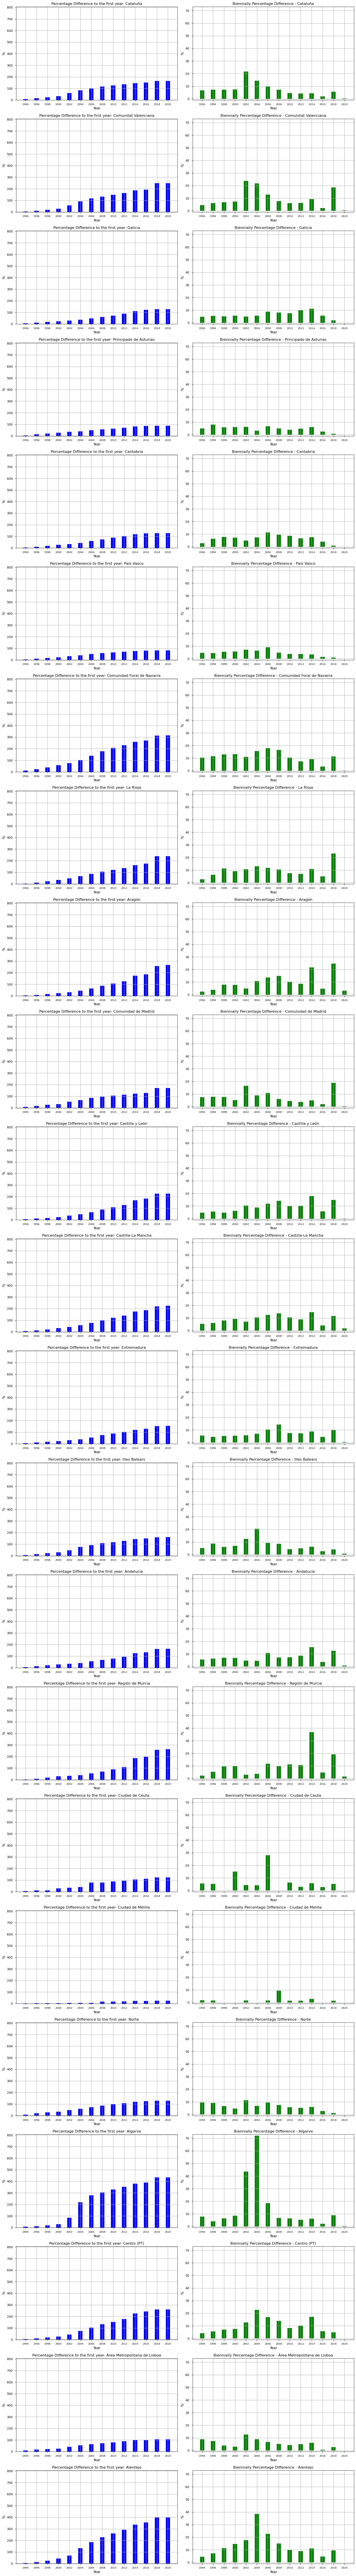

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionaries for yearly differences
yearly_absolute_percentage_diff = {}
yearly_first_year_percentage_diff = {}
yearly_relative_percentage_diff = {}

# Loop through each region to calculate differences
for region, urban_area in growth.items():
    years = list(urban_area.keys())
    values = list(urban_area.values())
    
    # Calculate percentage differences
    # Absolute difference relative to the first year (in percentage points)
    yearly_absolute_percentage_diff[region] = [(values[j] - values[0]) for j in range(1, len(values))]
    
    # First-year-based percentage difference (relative to initial year in %)
    yearly_first_year_percentage_diff[region] = [(values[j] - values[0]) / values[0] * 100 if values[0] != 0 else 0 for j in range(1, len(values))]
    
    # Year-over-year relative percentage difference (compared to the previous year)
    yearly_relative_percentage_diff[region] = [(values[j] - values[j-1]) / values[j-1] * 100 if values[j-1] != 0 else 0 for j in range(1, len(values))]

# Now plot both

# All regions
all_regions = list(yearly_absolute_percentage_diff.keys())

# Number of regions
num_regions = len(all_regions)
cols = 2  # Two plots per row (one for absolute, one for relative)
rows = num_regions  # We need one row per region

fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))  # Adjust size for layout

# Flatten the axes for easier iteration
axes = axes.ravel()

# Calculate common y-axis limits for absolute and relative percentage differences
y_min_abs = min([min(v) for v in yearly_absolute_percentage_diff.values()]) - 1
y_max_abs = max([max(v) for v in yearly_absolute_percentage_diff.values()]) + 1

y_min_rel = min([min(v) for v in yearly_relative_percentage_diff.values()]) - 1
y_max_rel = max([max(v) for v in yearly_relative_percentage_diff.values()]) + 1

# Iterate through all regions and create plots for first-year-based and year-over-year relative differences
for idx, region in enumerate(all_regions):
    years = list(growth[region].keys())[1:]  # Exclude the first year
    
    abs_values = yearly_first_year_percentage_diff[region]  # First-year-based difference
    rel_values = yearly_relative_percentage_diff[region]  # Year-over-year difference
    
    # Plot: First-Year-Based Percentage Difference
    ax_abs = axes[2 * idx]
    ax_abs.bar(years, abs_values, label='%', color='b')
    ax_abs.set_xlabel('Year')
    ax_abs.set_ylabel('%')
    ax_abs.set_title(f'Percentage Difference to the first year- {region}')
    ax_abs.grid(True)
    ax_abs.set_ylim(y_min_abs, y_max_abs)
    ax_abs.set_xticks(years)
    ax_abs.set_xticklabels(years, fontsize=8)

    # Plot: Year-over-Year Percentage Difference
    ax_rel = axes[2 * idx + 1]
    ax_rel.bar(years, rel_values, label='%', color='g')
    ax_rel.set_xlabel('Year')
    ax_rel.set_ylabel('%')
    ax_rel.set_title(f'Biennially Percentage Difference - {region}')
    ax_rel.grid(True)
    ax_rel.set_ylim(y_min_rel, y_max_rel)
    ax_rel.set_xticks(years)
    ax_rel.set_xticklabels(years, fontsize=8)

# Remove any unused axes
if len(axes) > 2 * num_regions:
    for ax in axes[2 * num_regions:]:
        ax.axis('off')

plt.tight_layout()
plt.show()


#### Map & Plot Analysis

**How to interpret the maps:** Each map shows how urban area changed in percentage terms from one year to the next, for different regions. Dark colors represent regions with low growth, while lighter colors represent regions with a high growth. If a region is consistently colored the same way across all years, it means its rate of change is relatively steady across time.

**How to interpret the plots:** The percentage difference to the first year plots show the absolute percentage difference relative to the first year for each subsequent year. The Biennially percentage difference shows the difference between years. Essentially, The blue bar plots help in understanding the overall urban expansion of a region relative to the first year, providing insight into long-term trends and growth. The green bar plots capture short-term dynamics and fluctuations, showing which years experienced more significant changes in urban areas.


**Analysis:** 

* Across most regions, the trend is a steady increase in urban coverage, particularly visible in the blue bars, which show the cumulative expansion relative to the first year.

* The maps and green bars highlight that certain regions experienced sharper urban growth in specific years, such as Alentejo and Algarve around 2010, while others maintained more steady year-over-year changes.

* Post-2014, urban growth appears to stabilize in many regions, with most areas exhibiting minimal changes in urban coverage, as reflected in the maps (with predominantly dark hues) and the relative percentage difference charts (with smaller green bars).

#### Map the slope in urbanization for the entired time-period

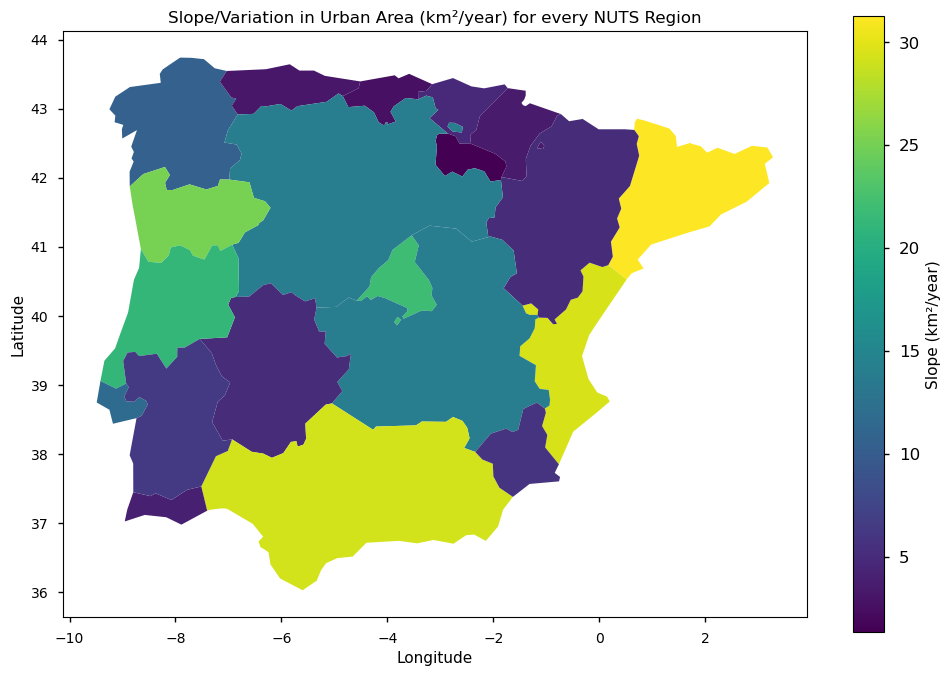

In [72]:
# Create a colormap
cmap = "viridis"
norm = colors.Normalize(vmin=merged_df["Slope"].min(), vmax=merged_df["Slope"].max())

# # Plot the GeoDataFrame with slope values as the colormap
fig, ax = plt.subplots(figsize=(12, 8))
merged_df.plot(column="Slope", cmap=cmap, ax=ax, norm=norm)

#Add a colorbar with a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array to create a colorbar
cbar = plt.colorbar(sm, ax=ax, label="Slope")
cbar.set_label("Slope (km²/year)", rotation=90)
cbar.ax.tick_params(labelsize=12)

plt.title("Slope/Variation in Urban Area (km²/year) for every NUTS Region")
#plt.axis("off")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


#### Map Analysis

**How to Interpret:**
High Slope Values (Yellow-Green) indicate that urban areas in the region are expanding rapidly, with more than 20 km² of new urban development added each year. Low Slope Values (Purple-Blue) have slower urban growth rates, suggesting that either the region is already highly urbanized with less available land for expansion, or the demand for new urban areas is lower.

**Analysis**

* Southeastern Spain (like regions in Andalucía and Comunidad Valenciana) are shown in bright yellow, meaning they have seen the highest annual growth rates in urban area. These regions have expanded by up to 30 km²/year.

* Northern Spain (e.g., Galicia, Castilla y León) has more blue/purple regions, signifying slower or more moderate urban growth, typically under 5 km²/year.

* Central Spain shows a mixture of colors, with some regions exhibiting moderate growth (green, around 10-15 km²/year), while others have slower urbanization rates (darker colors).

(C3S2_D520.5.3.14b_Quality_Assessment_User_Questions_LULC_UQ2_v1.5.ipynb:code-section-5)=
### 5. Main Takeaways

* The highest urban growth rates per year were observed in Cataluña (31.275 km²/year), Comunitat Valenciana (29.499 km²/year), and Andalucía (29.224 km²/year). A peer-reviewed study  found that cities in these regions show significant urban growth rates, supported by both population increases and expansion in built-up areas [[3]](https://www.mdpi.com/2071-1050/11/24/6948). A study on Metropolitan Area of Valencia urban growth highlights significant urban expansion from the mid-1950s to 2012, with an increase of urban areas by 206% [[4]](https://doi.org/10.3232/SJSS.2019.V9.N2.03). Similarly, research on population growth and urban management in Barcelona shows considerable urban expansion over a 44-year period, emphasizing the transition from mono-centric to polycentric urban structures [[5]](https://doi.org/10.1007/S12061-021-09395-2). Furthermore, urban expansion and population dynamics in Andalucía indicate significant changes in urban areas, driven by internal migration and demographic shifts [[6]](https://revistaseug.ugr.es/index.php/cuadgeo/article/view/1711).

* Between 1992 and 2020, the urban areas of Algarve and Alentejo expanded approximately 4 times their original area. However, due to the initially small size of these urban areas, slope graphs did not effectively depict this growth. Calculating the percentage difference in area between the first and last years of the dataset reveals significant growth, emphasizing the importance of using diverse methods to explore the data. This necessity is highlighted in a peer-reviewd study, that analysed urban growth in the Algarve using multiple methods. Urban growth in the Algarve region has been analysed through various methods, indicating a significant increase in urban areas due to tourism and economic changes [[7]](https://doi.org/10.2139/ssrn.1940371). Another study on the Algarve used the MOLAND model to present different scenarios of urban growth, confirming the substantial increase in urban areas and the complexity in capturing this growth accurately [[8]](https://doi.org/10.1016/J.LANDURBPLAN.2009.01.011). 


* By 2020, the regions with the most substantial urban areas are Andalucía, Cataluña, and Northern Portugal. The urban growth in Northern Portugal, especially in the Porto Metropolitan Area. Studies on urban policies and urban growth in Portugal indicate significant urban development in the Northern region [[9]](https://doi.org/10.1007/978-3-030-29073-3_3) [[10]](https://doi.org/10.1016/S0198-9715(01)00014-X).

## ℹ️ If you want to know more

### Key Resources

* The CDS catalogue entry for the data used was [Land cover classification gridded maps from 1992 to present derived from satellite observations](https://cds.climate.copernicus.eu/datasets/satellite-land-cover?tab=overview)

* Product User Guide and Specification of the dataset [version 2.1](https://datastore.copernicus-climate.eu/documents/satellite-land-cover/D5.3.1_PUGS_ICDR_LC_v2.1.x_PRODUCTS_v1.1.pdf) and [version 2.0](https://datastore.copernicus-climate.eu/documents/satellite-land-cover/D3.3.11-v1.0_PUGS_CDR_LC-CCI_v2.0.7cds_Products_v1.0.1_APPROVED_Ver1.pdf) 

* [Eurostat NUTS](https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts) (Nomenclature of territorial units for statistics)

* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), c3s_eqc_automatic_quality_control, prepared by [BOpen](https://www.bopen.eu/)




### References

<a name="code-section-5"></a>[[1]](https://ec.europa.eu/eurostat/en/web/products-statistical-books/-/ks-01-16-691) Eurostat, Cities (Urban Audit)

[[2]](https://www.fao.org/3/cc3017en/online/state-food-security-and-nutrition-2023/drivers-patterns-dynamics-urbanization.html) Urbanisation: Trends and drivers

[[3]](https://www.mdpi.com/2071-1050/11/24/6948) Alvarez-Palau, E. J., Martí-Henneberg, J., & Solanas-Jiménez, J. (2019). Urban growth and long-term transformations in Spanish cities since the mid-nineteenth century: a methodology to determine changes in urban density. Sustainability, 11(24), 6948.

[[4]](https://doi.org/10.3232/SJSS.2019.V9.N2.03) Lozano, A., Vidal, C., & Díaz, J. (2019). Urban growth (1956-2012) and soil sealing in the metropolitan area of Valencia (Eastern Spain). Spanish Journal of Soil Science. 

[[5]](https://doi.org/10.1007/S12061-021-09395-2) Vinci, S., Egidi, G., Gay, A., & Salvati, L. (2021). Population Growth and Urban Management in Metropolitan Regions: the Contribution of Natural Balance and Migration to Polycentric Development in Barcelona. Applied Spatial Analysis and Policy, 15, 71-94. 

[[6]](https://revistaseug.ugr.es/index.php/cuadgeo/article/view/1711) Calmaestra, J. A., & Jiménez, C. (2005). La dinámica demográfica en Andalucía en el último cuarto del siglo XX. Cuadernos Geográficos, 36(1), 125–151. Recuperado a partir de 

[[7]](https://doi.org/10.2139/ssrn.1940371) Vaz, E., Nijkamp, P., Painho, M., & Gaetano, M. (2011). A Multi-Scenario Forecast of Urban Change: A Study on Urban Growth in the Algarve. Urban Research eJournal.

[[8]](https://doi.org/10.1016/J.LANDURBPLAN.2009.01.011) Petrov, L., Lavalle, C., & Kasanko, M. (2009). Urban land use scenarios for a tourist region in Europe: Applying the MOLAND model to Algarve, Portugal. Landscape and Urban Planning, 92, 10-23.

[[9]](https://doi.org/10.1007/978-3-030-29073-3_3) Cavaco, C., Florentino, R., & Pagliuso, A. (2019). Urban Policies in Portugal. Foregrounding Urban Agendas. 

[[10]](https://doi.org/10.1016/S0198-9715(01)00014-X) Silva, E., & Clarke, K. (2002). Calibration of the SLEUTH urban growth model for Lisbon and Porto, Portugal. Computers, Environment and Urban Systems, 26, 525-552